# Notes
The PCA analysis at the bottom is simply for academic purposes: we are not expecting a correlation between ad formats or executions and sentiments or metrics.  The correlation we're looking for is between the aforementioned and APD and TET.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
metrics = pd.read_csv('D:\\Kargo\\Prediction-Models\\Data\\q3_cnn_metrics.csv')
sentiment = pd.read_csv('D:\\Kargo\\Prediction-Models\\Data\\cnn_watson_sentiment.csv')

# merge and clean data
df = metrics.merge(sentiment,left_on='ARTICLE',right_on='article', how='outer')
filtered = df.dropna(subset=['S_APD','article'], how='any')

filtered = filtered[filtered.A_TET > 0]

filtered.shape

(152090, 25)

In [4]:
filtered.corr(method='pearson')

,S_APD,A_APD,S_TUS,A_TUS,S_TUI,A_TUI,S_TUH,A_TUH,S_TET,A_TET,S_UIT,A_UIT,IMPRESSIONS,disgust,anger,sadness,joy,fear,sentiment_score,relevance
S_APD,1.000000,0.543440,0.353231,0.101694,0.389396,0.151627,0.382134,0.148023,0.748235,0.375029,0.006581,0.006531,0.084564,0.042192,0.060461,0.059933,-0.016205,0.063902,-0.043005,0.001709
A_APD,0.543440,1.000000,0.128644,0.211957,0.255529,0.387606,0.211409,0.302578,0.350076,0.735163,0.006486,0.006485,0.002532,0.033590,0.040587,0.034020,-0.004601,0.041448,-0.026859,-0.001759
S_TUS,0.353231,0.128644,1.000000,0.476242,0.204707,0.049688,0.190703,0.051052,0.278597,0.083016,-0.000366,-0.000459,0.076556,0.021011,0.019917,0.016990,-0.017453,0.026815,-0.009024,0.005413
A_TUS,0.101694,0.211957,0.476242,1.000000,0.060994,0.110231,0.049964,0.081858,0.074341,0.168618,0.000166,0.000152,-0.004686,0.014440,0.006617,0.001040,0.000388,0.009660,0.002584,-0.000749
S_TUI,0.389396,0.255529,0.204707,0.060994,1.000000,0.566802,0.363445,0.192236,-0.054191,-0.090846,-0.000846,-0.000914,0.054426,0.007685,0.028077,0.031306,-0.013325,0.042291,-0.013304,0.003798
A_TUI,0.151627,0.387606,0.049688,0.110231,0.566802,1.000000,0.192105,0.295113,-0.099390,-0.059949,-0.000207,-0.000213,-0.005433,0.007349,0.016040,0.010919,0.000078,0.021260,-0.005205,0.001005
S_TUH,0.382134,0.211409,0.190703,0.049964,0.363445,0.192105,1.000000,0.551604,0.228527,0.096459,0.004354,0.004203,0.073197,0.016060,0.029784,0.032171,-0.007453,0.033063,-0.011995,0.006253
A_TUH,0.148023,0.302578,0.051052,0.081858,0.192236,0.295113,0.551604,1.000000,0.061108,0.177788,0.005230,0.005193,-0.003179,0.010318,0.014098,0.010774,0.002471,0.012882,-0.005028,0.000696
S_TET,0.748235,0.350076,0.278597,0.074341,-0.054191,-0.099390,0.228527,0.061108,1.000000,0.548906,0.008281,0.008274,0.085771,0.034801,0.039872,0.040079,-0.006699,0.040121,-0.031936,0.000672
A_TET,0.375029,0.735163,0.083016,0.168618,-0.090846,-0.059949,0.096459,0.177788,0.548906,1.000000,0.008781,0.008800,0.005084,0.023414,0.021611,0.018343,0.003567,0.023040,-0.016854,-0.001078


In [ ]:
filtered.describe()

In [3]:
filtered[:10]

,ARTICLE,S_APD,A_APD,S_TUS,A_TUS,S_TUI,A_TUI,S_TUH,A_TUH,S_TET,...,FORMAT,EXECUTION,article,disgust,anger,sadness,joy,fear,sentiment_score,relevance
15,http://www.cnn.com/2017/06/01/app-news-section...,27816.467023,19370.157,0.000000,-1.000,28983.717616,16635.763,0.000000,-1.000,1961.270157,...,Hover,carousel,http://www.cnn.com/2017/06/01/app-news-section...,0.203567,0.115866,0.224983,0.377126,0.083336,0.604081,0.858731
16,http://www.cnn.com/2017/06/01/app-news-section...,2131.214375,90932.333,140061.778557,202626.000,19816.218250,78373.333,27236.871767,18934.666,11896.443436,...,Spotlight,expandable,http://www.cnn.com/2017/06/01/app-news-section...,0.203567,0.115866,0.224983,0.377126,0.083336,0.604081,0.858731
17,http://www.cnn.com/2017/06/01/app-news-section...,4861.683469,3764.076,44696.739532,24005.000,4800.370819,3640.000,0.000000,-1.000,556.237137,...,Hover,social_hijack,http://www.cnn.com/2017/06/01/app-news-section...,0.203567,0.115866,0.224983,0.377126,0.083336,0.604081,0.858731
18,http://www.cnn.com/2017/06/01/app-news-section...,4237.203697,4846.000,2857.601277,1985.666,1598.746459,1111.033,0.000000,-1.000,2068.722966,...,Hover,store_locator,http://www.cnn.com/2017/06/01/app-news-section...,0.203567,0.115866,0.224983,0.377126,0.083336,0.604081,0.858731
21,http://www.cnn.com/2017/06/01/app-news-section...,0.000000,834.000,0.000000,11710.000,0.000000,-1.000,0.000000,-1.000,0.000000,...,Hover,NaN,http://www.cnn.com/2017/06/01/app-news-section...,0.203567,0.115866,0.224983,0.377126,0.083336,0.604081,0.858731
22,http://www.cnn.com/2017/06/01/app-news-section...,15370.117668,16823.304,2801.485243,2622.260,193.575735,1920.260,0.000000,-1.000,15266.434623,...,Hover,expandable,http://www.cnn.com/2017/06/01/app-news-section...,0.203567,0.115866,0.224983,0.377126,0.083336,0.604081,0.858731
23,http://www.cnn.com/2017/06/01/app-news-section...,220.168049,2215.705,758.920286,1715.000,220.168049,2013.705,0.000000,-1.000,4.058325,...,BreakOut,animated,http://www.cnn.com/2017/06/01/app-news-section...,0.203567,0.115866,0.224983,0.377126,0.083336,0.604081,0.858731
26,http://www.cnn.com/2017/06/01/app-news-section...,11200.605670,12154.000,0.000000,-1.000,6278.987515,6119.000,0.000000,-1.000,5866.031228,...,Lightning,standard,http://www.cnn.com/2017/06/01/app-news-section...,0.203567,0.115866,0.224983,0.377126,0.083336,0.604081,0.858731
29,http://www.cnn.com/2017/06/01/app-news-section...,1106.124044,12748.000,6529.849922,14145.500,571.652342,552.500,0.000000,-1.000,4787.007416,...,Anchor,NaN,http://www.cnn.com/2017/06/01/app-news-section...,0.203567,0.115866,0.224983,0.377126,0.083336,0.604081,0.858731
33,http://www.cnn.com/2017/06/01/architecture/gal...,867.464697,2085.000,147.740881,150.578,872.081599,1875.736,1151.147711,1180.052,65.149620,...,Spotlight,expandable,http://www.cnn.com/2017/06/01/architecture/gal...,0.052384,0.083202,0.123927,0.196312,0.065546,0.693645,0.921920


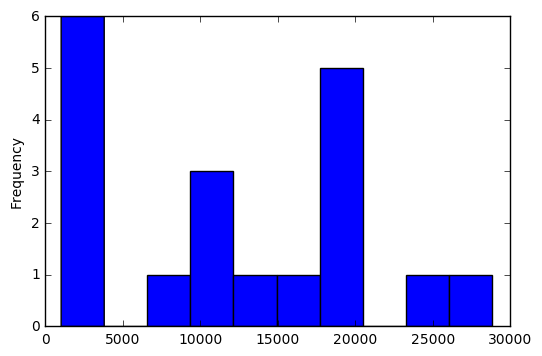

In [10]:
sample = filtered[:50].groupby("EXECUTION").mean().plot(kind="hist")

In [173]:
filtered.pivot_table("IMPRESSIONS","FORMAT").sort_values(ascending=False)

FORMAT
Venti                     4210.553890
Hover                     3318.978911
Lightning                 3246.664799
BreakOut                  2302.208612
Banner                    1698.356383
MiddleBanner              1586.335000
SideKick                  1424.074021
Anchor                    1047.059845
Spotlight                 1038.792191
Marquee                     84.977273
TopBanner                   61.906977
Interstitial                31.342857
FullScreenInterstitial      25.476190
Name: IMPRESSIONS, dtype: float64

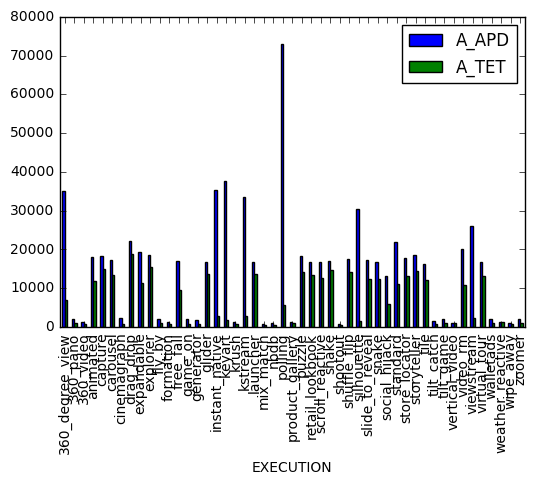

In [18]:
filtered.pivot_table(["A_APD","A_TET"],"EXECUTION").plot(kind="bar")

In [163]:
# PCA execution analysis
# the point of PCA is to reduce the dimensionality of the original feature space by projecting it onto a smaller subspace
# where the eigenvectors form the axes

# we can interchange the last variable for our dependent (EXECUTION, FORMAT, etc)
subset = filtered[["A_APD", "A_TET", "A_TUI", "disgust", "anger", "sadness", "joy", "fear", "FORMAT"]].dropna().copy().reset_index()
subset.head()

,index,A_APD,A_TET,A_TUI,disgust,anger,sadness,joy,fear,FORMAT
0,15,19370.157,1859.578,16635.763,0.203567,0.115866,0.224983,0.377126,0.083336,Hover
1,16,90932.333,9532.666,78373.333,0.203567,0.115866,0.224983,0.377126,0.083336,Spotlight
2,17,3764.076,689.923,3640.000,0.203567,0.115866,0.224983,0.377126,0.083336,Hover
3,18,4846.000,2672.666,1111.033,0.203567,0.115866,0.224983,0.377126,0.083336,Hover
4,21,834.000,797.000,-1.000,0.203567,0.115866,0.224983,0.377126,0.083336,Hover


In [164]:
# select training sample
X = subset.ix[:,1:9].values # data
y = subset.ix[:,9].values # labels

In [165]:
# standardize
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [166]:
# build covariance matrix
# this is the classic approach to PCA -- to perform the eigendecomposition on the covariance matrix (where each element
# represents the covariance between two features)
cov_mat = np.cov(X_std.T)

In [167]:
# perform an eigendecomposition
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print("Eigenvectors", eig_vecs)
print("Eigenvalues", eig_vals)

Eigenvectors [[-0.69637657  0.6835904  -0.21223597  0.03654539 -0.02723304 -0.01176208
   0.02241401  0.00134095]
 [ 0.62185348  0.59614522 -0.20621632 -0.45612619  0.08041944 -0.02494254
   0.01407585  0.00673037]
 [ 0.35807122  0.28424036 -0.08364907  0.86149546 -0.202643    0.01299255
   0.02064287 -0.0127164 ]
 [ 0.00349624  0.14742147  0.45357406 -0.12057968 -0.46072909  0.24630368
  -0.28865566 -0.6338193 ]
 [ 0.00690969  0.17086421  0.51598802 -0.04449426 -0.20424037  0.22872366
  -0.2110707   0.75096925]
 [ 0.00713364  0.12331397  0.32707834  0.10552797  0.58715176  0.57611962
   0.41028759 -0.14706961]
 [-0.00256432 -0.1083281  -0.45588499  0.0410416   0.17433149  0.56863221
  -0.65116342  0.0315443 ]
 [ 0.00504881  0.13657774  0.34445482  0.13819964  0.56798134 -0.48045218
  -0.52787376 -0.10716788]]
Eigenvalues [ 0.14297058  1.83483685  1.56705072  1.05108495  1.01746897  0.88732437
  0.78411999  0.71519617]


In [168]:
# correlation matrix (this is typically used more in finance) but seems to get us the same result
cor_mat = np.corrcoef(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cor_mat)

In [103]:
# Singular Vector Decomposition
# we'll perform this to improve the computational efficiency of PCA

# u,s,v = np.linalg.svd(X_std.T) this throws a memory error

In [169]:
# In order to decide which eigenvector(s) can be dropped without losing too much information for construction of
# lower-dim subspace, we prune the eigenvectors with the lowest eigenvalues (they bear the least info about
# the distribution of the data)

# rank eigenvalues from highest to lowest to choose top eigenvectors
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# sort (eigval, eigvec) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# confirm
print("Eigenvalues in descending order:")
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
1.83482478531
1.56704041883
1.05107804203
1.01746227765
0.887318537905
0.784114831099
0.715191464314
0.142969642867


In [170]:
# Explained Variance
# we need to answer the question: how many principle components are we going to choose for new feature subspace?
# The Explained Variance tells us how much information (variance) can be attributed to each of the principle components

tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

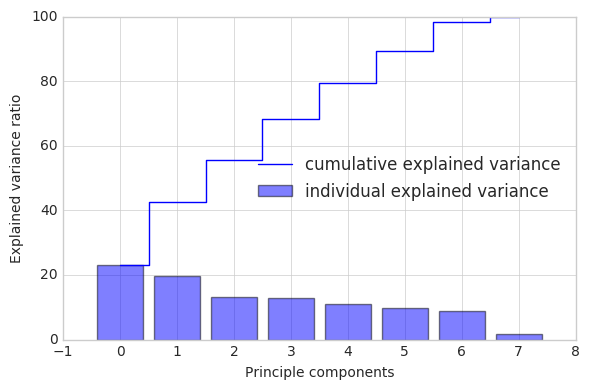

In [171]:
# plot the variances
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6,4))
    plt.bar(range(8), var_exp, alpha=0.5, align='center', label='individual explained variance')
    plt.step(range(8), cum_var_exp, where='mid', label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principle components')
    plt.legend(loc='best')
    plt.tight_layout()

The plot above shows that the bulk of the variance is explained by nearly all of the principal components, with the first two  (APD and TET) being slightly higher than the others.  We can comfortably drop the 7th component, but lets take all the ones with Eigenvalues > 1.0 (4)

In [174]:
# Project Matrix
# This is the projection matrix that will be used to transform the metric + sentiment data onto the new feature subspace
# It's really just a matrix of our top eigenvectors

# We want to reduce our 8-dimensional feature space to a 2-dimensional

matrix_w = np.hstack((eig_pairs[0][1].reshape(8,1),
                     eig_pairs[1][1].reshape(8,1),
                     eig_pairs[2][1].reshape(8,1),
                     eig_pairs[3][1].reshape(8,1)))

print("Matrix W:", matrix_w)

Matrix W: [[-0.6835904   0.21223597 -0.03654539 -0.02723304]
 [-0.59614522  0.20621632  0.45612619  0.08041944]
 [-0.28424036  0.08364907 -0.86149546 -0.202643  ]
 [-0.14742147 -0.45357406  0.12057968 -0.46072909]
 [-0.17086421 -0.51598802  0.04449426 -0.20424037]
 [-0.12331397 -0.32707834 -0.10552797  0.58715176]
 [ 0.1083281   0.45588499 -0.0410416   0.17433149]
 [-0.13657774 -0.34445482 -0.13819964  0.56798134]]


In [175]:
# Project onto new feature space
Y = X_std.dot(matrix_w)

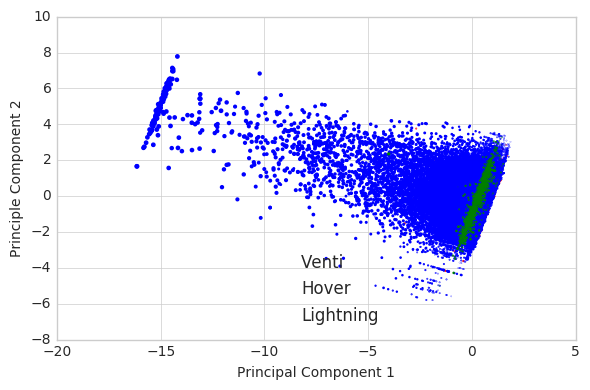

In [180]:
# plot top 4 executions store_locator, carousel, keyart, scroll_reactive

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6,4))
    for ex, col in zip(('Venti', 'Hover', 'Lightning'),
                        ('red','blue','green')):
        plt.scatter(Y[y==ex,0],
                   Y[y==ex,1],
                   Y[y==ex,2],
                    color=col,
                   label=ex)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principle Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

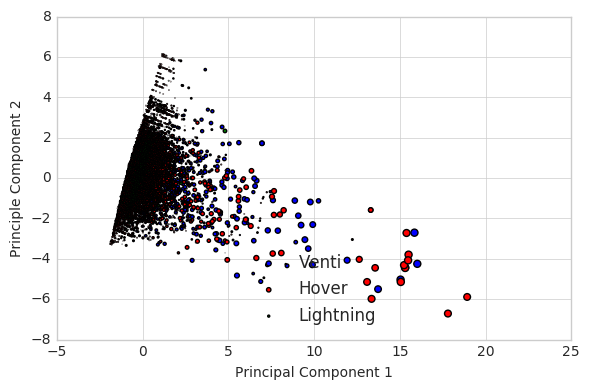

In [182]:
# SciKit-learn shortcut
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=4)
Y_sklearn = sklearn_pca.fit_transform(X_std)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6,4))
    for ex, color in zip(('Venti', 'Hover', 'Lightning'),
                        ('blue','red','green')):
        plt.scatter(Y_sklearn[y==ex,0],
                   Y_sklearn[y==ex,1],
                   Y_sklearn[y==ex,2],
                   label=ex,
                   c=color)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principle Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

# Takeaways
Given the relatively small correlation coefficients we found with the sentiment analysis, it's not surprising that they don't show up particularly well on PCA.  PCA works very well when strong correlations exist (of which there is an "average" correlation of APD and TET).

Note: The test was slightly more informative using FORMAT instead of EXECUTION, indicating that would be easier to predict.

The PCA graphs indicate that, for the most part, the metrics do not have much influence over the given constants (execution, format, etc) -- and this makes sense.  We wouldn't expect APD, TET or sentiment to inform the loading of ads.

The real analysis we want to do is the effect sentiment scores have on TET.